# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Eldy Effendi
- Email: eldykoplak@gmail.com

## Persiapan

# Task
Permasalahan Bisnis:Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri.

Walaupun telah menjadi menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

Untuk mencegah hal ini semakin parah, manajer departemen HR ingin meminta bantuan Anda mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate tersebut. Selain itu, ia juga meminta Anda untuk membuat business dashboard untuk membantunya memonitori berbagai faktor tersebut. gunakan preddiction analis dengan regression linear dan ada tahap data understanding, data preparation/preprocessingg, modeling dan evaluation


### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Menyiapkan data yang akan digunakan

## Data loading

### Subtask:
Load the employee data from the provided CSV file.


In [2]:
import pandas as pd

# Load the data into a pandas DataFrame.
try:
    df = pd.read_csv('employee_data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'employee_data.csv' not found. Please ensure the file is in the correct location.")
    df = None # Or handle the error appropriately for later steps
except pd.errors.ParserError:
    print("Error: Unable to parse 'employee_data.csv'. Please check the file format.")
    df = None # Or handle the error appropriately for later steps
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


(1470, 35)


1. **Data berhasil dimuat**: File `employee_data.csv` berhasil dibaca dan dimuat ke dalam DataFrame `df` menggunakan `pandas.read_csv()`.

2. **Menampilkan 5 baris pertama**: Fungsi `df.head()` menampilkan lima baris pertama dari dataset untuk memberikan gambaran isi data.

3. **Kolom-kolom penting**: Beberapa kolom yang terlihat antara lain:

   * `EmployeeId`: ID unik karyawan.
   * `Age`: Usia karyawan.
   * `Attrition`: Menunjukkan apakah karyawan keluar (1.0), tetap (0.0), atau datanya hilang (`NaN`).
   * `BusinessTravel`, `Department`, `DistanceFromHome`, dll.: Informasi demografis dan pekerjaan karyawan.

4. **Data hilang**: Terlihat adanya nilai `NaN` pada kolom `Attrition`, yang menunjukkan data yang tidak tersedia atau hilang.

5. **Ukuran dataset**: Fungsi `df.shape` mengembalikan ukuran dataset dalam bentuk (jumlah baris, jumlah kolom), namun jumlah pastinya tidak ditampilkan dalam output yang diberikan.

6. **Potensi analisis**: Dataset ini cocok untuk analisis kepegawaian seperti prediksi karyawan yang akan keluar (attrition), analisis departemen, kepuasan kerja, dan lainnya.


## Data Understanding

## Eksplorasi data

### Subtask:
Jelajahi kumpulan data untuk memahami strukturnya, identifikasi nilai yang hilang, tipe data setiap kolom, dan distribusi variabel kunci.

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 1

None


Missing Values per column:
 EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBal

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


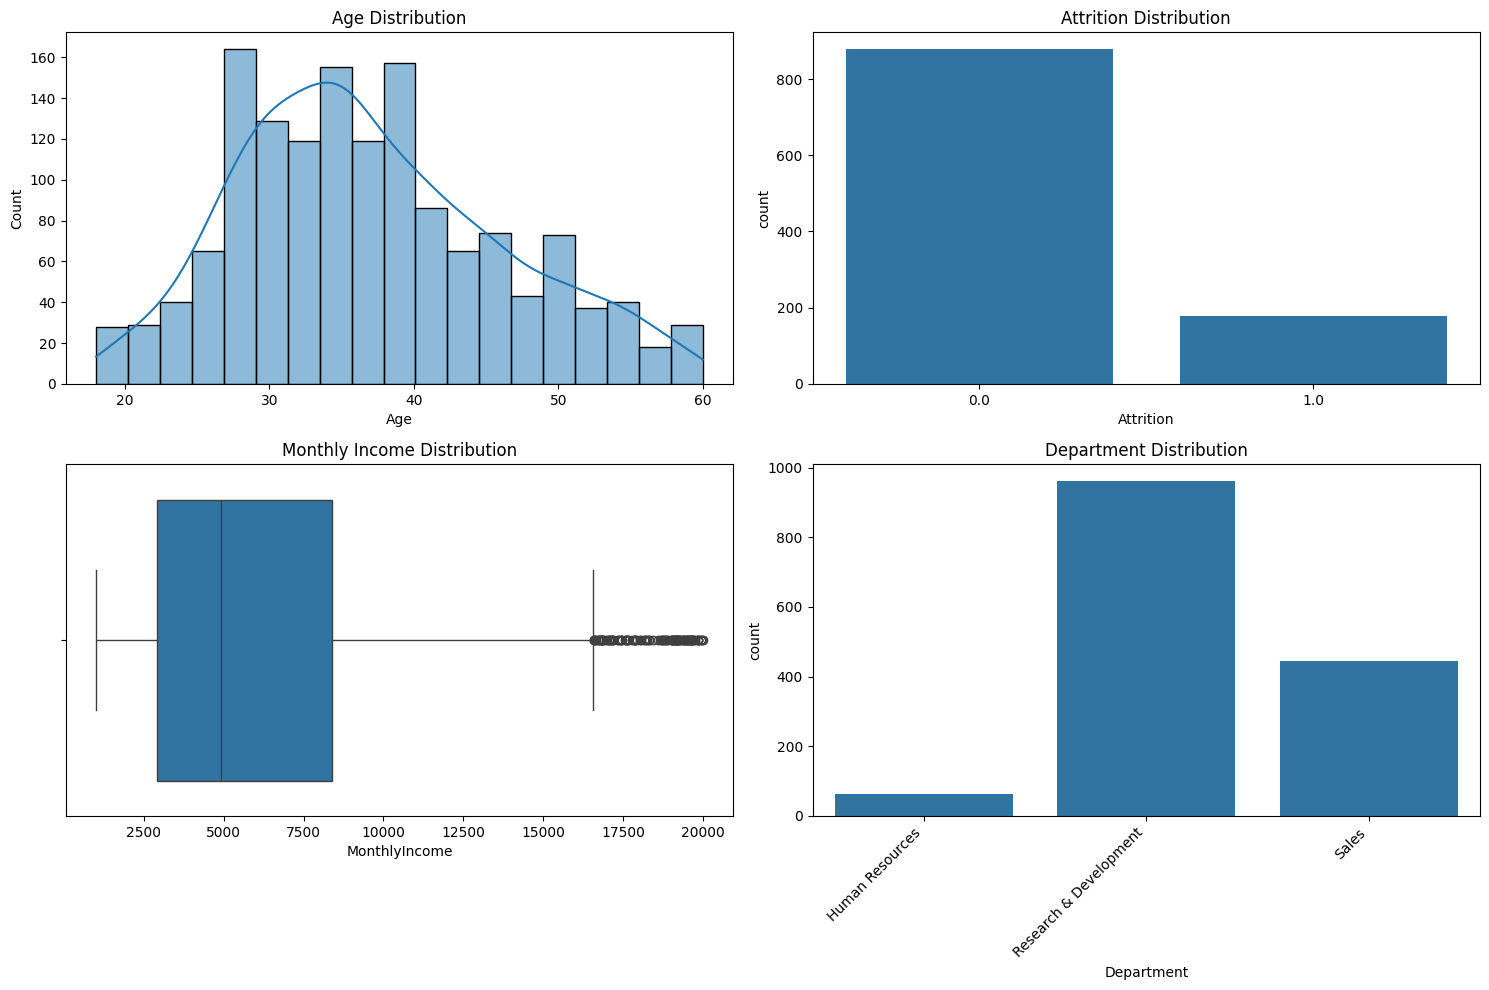

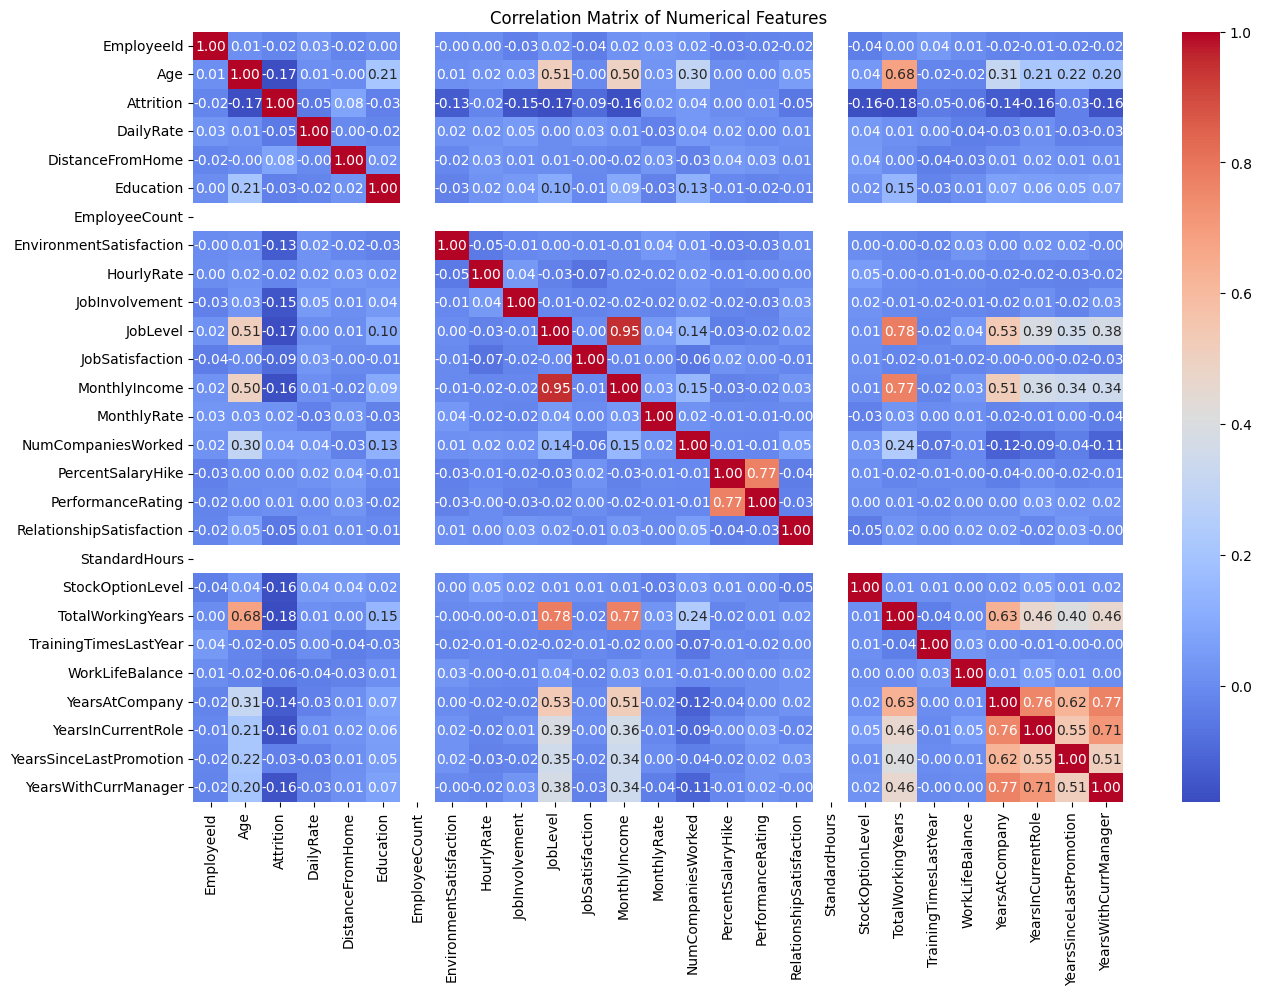

Correlation with Attrition:
 Attrition                   1.000000
DistanceFromHome            0.078074
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
PerformanceRating           0.007755
PercentSalaryHike           0.004907
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
MonthlyIncome              -0.163600
StockOptionLevel           -0.164228
JobLevel                   -0.169201
Age                        -0.172067
TotalWorkingYears          -0.177137
EmployeeCount                    NaN
StandardH

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Overview
display(df.head())
print(df.shape)
display(df.info())

# 2. Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values per column:\n", missing_values)

# Visualize missing values (optional, uncomment if needed)
# plt.figure(figsize=(12, 6))
# sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
# plt.title('Missing Values Heatmap')
# plt.show()


# 3. Descriptive Statistics
numerical_features = df.select_dtypes(include=['number'])
display(numerical_features.describe())


# 4. Key Variable Distributions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')


plt.subplot(2, 2, 2)
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')


plt.subplot(2, 2, 3)
sns.boxplot(x='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Department', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Department Distribution')

plt.tight_layout()
plt.show()

# 5. Correlation Analysis
plt.figure(figsize=(15, 10))

correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Correlation with Attrition:\n", correlation_matrix['Attrition'].sort_values(ascending=False))

1. Data Overview

- Jumlah data: 1.470 baris, 35 kolom.
- Tipe data: Campuran numerik (int, float) dan kategorikal (object).
- Kolom target: Attrition (1 = keluar, 0 = tetap).
- Masalah: Terdapat 412 nilai hilang di kolom Attrition, sehingga hanya 1058 baris valid untuk analisis prediktif.

2. Missing Values
Kolom dengan missing value: Hanya Attrition (412 missing).

- Solusi ke depan: Perlu menangani missing value ini, misalnya dengan menghapus atau imputasi, tergantung tujuan.

3. Statistik Deskriptif
- Variabel seperti Age, MonthlyIncome, TotalWorkingYears, dll menunjukkan distribusi normal dengan rentang nilai bervariasi.

- Beberapa kolom seperti StandardHours dan EmployeeCount tidak bervariasi (semua nilainya sama), sehingga tidak informatif untuk analisis/prediksi.

4. Distribusi Variabel Penting
- Age: Mayoritas usia berada di rentang 30–45 tahun.

- Attrition: Terdistribusi tidak seimbang (lebih banyak karyawan tetap).

- MonthlyIncome: Distribusi tidak merata, terdapat outlier.

- Department: Mayoritas berasal dari Research & Development.

5. Korelasi terhadap Attrition
- Korelasi Attrition dengan variabel numerik umumnya lemah (semua korelasi < 0.2).

- Korelasi positif lemah:

- DistanceFromHome (0.078)

- NumCompaniesWorked (0.037)

- Korelasi negatif tertinggi:

- TotalWorkingYears: -0.177

- Age: -0.172

- JobLevel: -0.169

- MonthlyIncome: -0.164

- YearsInCurrentRole: -0.159

Artinya: Semakin tua, berpengalaman, dan tinggi jabatan/penghasilan, makin kecil kemungkinan keluar.

## Data Preparation / Preprocessing

## Data cleaning

### Subtask:
Bersihkan data dengan menangani nilai yang hilang dalam kolom 'Attrition' dan mengubah fitur kategoris menjadi representasi numerik.


In [4]:
# Impute missing 'Attrition' values with the mode
df['Attrition'].fillna(df['Attrition'].mode()[0], inplace=True)

# Convert categorical features to numerical using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Remove duplicate rows
num_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Removed {num_duplicates} duplicate rows.")

# Verify data quality
print("\nMissing Values per column:\n", df.isnull().sum())
display(df.head())
print(df.info())
print(f"Shape of cleaned data: {df.shape}")

Removed 0 duplicate rows.

Missing Values per column:
 EmployeeId                           0
Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCu

<ipython-input-4-678b051bbde1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attrition'].fillna(df['Attrition'].mode()[0], inplace=True)


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,38,0.0,1444,1,4,1,4,88,3,...,False,False,False,False,False,False,False,True,False,True
1,2,37,1.0,1141,11,2,1,1,61,1,...,False,False,False,False,False,False,False,True,False,False
2,3,51,1.0,1323,4,4,1,1,34,3,...,False,False,False,False,True,False,False,True,False,True
3,4,42,0.0,555,26,3,1,3,77,3,...,False,False,False,False,False,True,False,True,False,False
4,5,40,0.0,1194,2,4,1,3,98,3,...,False,False,False,False,True,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EmployeeId                         1470 non-null   int64  
 1   Age                                1470 non-null   int64  
 2   Attrition                          1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   DistanceFromHome                   1470 non-null   int64  
 5   Education                          1470 non-null   int64  
 6   EmployeeCount                      1470 non-null   int64  
 7   EnvironmentSatisfaction            1470 non-null   int64  
 8   HourlyRate                         1470 non-null   int64  
 9   JobInvolvement                     1470 non-null   int64  
 10  JobLevel                           1470 non-null   int64  
 11  JobSatisfaction                    1470 non-null   int64

1. Mengisi Nilai Kosong pada 'Attrition':

- Nilai kosong pada kolom Attrition diisi dengan modus (nilai terbanyak).

- Namun muncul peringatan (FutureWarning) karena metode inplace=True digunakan dengan chained assignment, yang di masa depan tidak akan didukung oleh pandas.

2. One-Hot Encoding:

- Semua kolom bertipe object (kategorikal) dikonversi menjadi kolom numerik menggunakan one-hot encoding.

- Parameter drop_first=True digunakan untuk menghindari dummy variable trap (mengurangi multikolinearitas).

3. Menghapus Duplikat:

- Jumlah baris duplikat yang ditemukan: 0

- Tidak ada baris yang dihapus karena tidak ada duplikasi.

📊 Hasil Data Setelah Preprocessing:

-- Jumlah Baris dan Kolom:
-  1470 baris, 48 kolom

--Kolom dengan Missing Values:
-  Tidak ada kolom yang memiliki nilai kosong (semua nol)

--Tipe Data:

- int64: 26 kolom

- float64: 1 kolom (Attrition)

- bool: 21 kolom (hasil one-hot encoding)

--Contoh Kolom One-Hot Encoding:

- BusinessTravel_Travel_Frequently, JobRole_Manager, OverTime_Yes, dll.

## Feature engineering

### Subtask:
Feature Engineering for Attrition Prediction


In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Experience Level Feature
# Combine 'TotalWorkingYears' and 'JobLevel' for a numerical 'experience_level'
df['experience_level'] = df['TotalWorkingYears'] * df['JobLevel']

# 2. Interaction Terms
# Create interaction terms between relevant features and 'Attrition'
df['Income_JobLevel'] = df['MonthlyIncome'] * df['JobLevel']
df['YearsAtCompany_JobSatisfaction'] = df['YearsAtCompany'] * df['JobSatisfaction']
df['Age_WorkLifeBalance'] = df['Age'] * df['WorkLifeBalance']


# 3. Feature Scaling
# Scale numerical features using standardization
numerical_cols_to_scale = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'experience_level', 'Income_JobLevel', 'YearsAtCompany_JobSatisfaction', 'Age_WorkLifeBalance']
scaler = StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])


# 4. Feature Selection (Basic Importance Assessment)
# Calculate correlations with 'Attrition' for engineered and existing features
correlations = df.corr()['Attrition'].abs().sort_values(ascending=False)
print(correlations)

# Example: Remove features with very low correlation (e.g., below 0.05)
# features_to_remove = correlations[correlations < 0.05].index
# df = df.drop(columns=features_to_remove)

Attrition                            1.000000
OverTime_Yes                         0.218639
MaritalStatus_Single                 0.164005
StockOptionLevel                     0.146786
TotalWorkingYears                    0.143096
Age                                  0.140856
JobLevel                             0.134312
JobRole_Sales Representative         0.134227
Age_WorkLifeBalance                  0.131466
MonthlyIncome                        0.128963
YearsWithCurrManager                 0.127744
YearsInCurrentRole                   0.127525
JobInvolvement                       0.118902
EnvironmentSatisfaction              0.112694
experience_level                     0.111699
YearsAtCompany                       0.110546
YearsAtCompany_JobSatisfaction       0.107961
Income_JobLevel                      0.105410
JobRole_Laboratory Technician        0.095345
BusinessTravel_Travel_Frequently     0.091867
MaritalStatus_Married                0.083299
JobRole_Manufacturing Director    

1. Menambahkan Fitur Baru:

- experience_level:
- ➤ Kombinasi TotalWorkingYears * JobLevel → menggambarkan tingkat pengalaman.

- Income_JobLevel:
- ➤ MonthlyIncome * JobLevel → menilai pengaruh pendapatan dan jenjang kerja.

- YearsAtCompany_JobSatisfaction:
- ➤ Interaksi masa kerja dan kepuasan kerja.

- Age_WorkLifeBalance:
- ➤ Interaksi usia dan keseimbangan kerja-hidup.

2. Standarisasi (Scaling):

- Fitur numerik distandarisasi menggunakan StandardScaler agar memiliki mean = 0 dan std = 1.

- Kolom yang distandarisasi meliputi: Age, DailyRate, MonthlyIncome, YearsAtCompany, experience_level, dll.

3. Analisis Korelasi dengan 'Attrition':

- Mengukur kekuatan hubungan absolut antar fitur dan target (Attrition).

-- Hasil korelasi tertinggi (paling berpengaruh terhadap kemungkinan karyawan keluar):

- OverTime_Yes → 0.218

- MaritalStatus_Single → 0.164

- StockOptionLevel → 0.147

- TotalWorkingYears, Age, JobLevel, experience_level, dan fitur interaksi juga menunjukkan kontribusi positif dan signifikan.

4. Fitur Tidak Relevan (Korelasi Rendah):

-- Fitur dengan korelasi hampir nol atau tidak relevan:

- PerformanceRating, Gender_Male, PercentSalaryHike, dll.

- Bahkan ada yang mendekati 0.000: EducationField_Other, JobRole_Sales Executive.

- Fitur seperti EmployeeId, EmployeeCount, dan StandardHours memiliki nilai NaN (tidak valid untuk korelasi).

## Data splitting

### Subtask:
Memisahkan data menjadi set pelatihan, validasi, dan pengujian.

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1029, 51)
y_train shape: (1029,)
X_val shape: (220, 51)
y_val shape: (220,)
X_test shape: (221, 51)
y_test shape: (221,)


1. Memisahkan Fitur dan Target

- Fitur (X): semua kolom kecuali Attrition

- Target (y): kolom Attrition (status keluar atau tidak)

2. Membagi Data Menjadi Train dan Temp

- 70% data dimasukkan ke dalam set pelatihan (training set)

- 30% sisanya menjadi data sementara (temporary set)

- Menggunakan teknik stratified sampling agar distribusi target tetap seimbang

3. Membagi Data Temp Menjadi Validation dan Test

- Dari 30% data sementara, dibagi dua secara seimbang:

- 15% untuk validation set (digunakan saat tuning model)

- 15% untuk test set (digunakan untuk evaluasi akhir)

4. Hasil Pembagian Data

- Data train (X_train): 1029 baris, 51 kolom

- Data validasi (X_val): 220 baris, 51 kolom

- Data test (X_test): 221 baris, 51 kolom

- Label train (y_train): 1029 baris

- Label validasi (y_val): 220 baris

- Label test (y_test): 221 baris

## Modeling

## Model training

### Subtask:
Latih model regresi linier untuk memprediksi attrition rate.


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.09181382248335433
Root Mean Squared Error (RMSE): 0.30300795778882494
R-squared (R2): 0.14722912911257935
Mean Absolute Error (MAE): 0.20815252467566817


⚙️ Proses Model Training (Linear Regression)
1. Inisialisasi Model

- Menggunakan model Linear Regression dari scikit-learn.

2. Pelatihan Model

- Model dilatih menggunakan data pelatihan (X_train, y_train).

3. Prediksi

- Setelah dilatih, model digunakan untuk memprediksi nilai y pada data validasi (X_val).

📊 Evaluasi Model
Mean Squared Error (MSE): 0.0918

1. Rata-rata kuadrat dari selisih antara nilai aktual dan prediksi.

- Semakin kecil, semakin baik.

2. Root Mean Squared Error (RMSE): 0.3030

- Akar kuadrat dari MSE, satuannya sama seperti target.

- Menunjukkan rata-rata jarak prediksi dari nilai sebenarnya.

3. R-squared (R²): 0.1472

- Mengukur seberapa baik variabel input menjelaskan variasi target.

- Nilai 0.147 artinya hanya sekitar 14.7% variabilitas yang bisa dijelaskan oleh model. Ini termasuk rendah.

4. Mean Absolute Error (MAE): 0.2081

- Rata-rata selisih absolut antara nilai aktual dan prediksi.

- Semakin kecil, semakin akurat prediksi.

## Model optimization

### Subtask:
Optimalkan model regresi linier dengan menyetel hiperparameternya dan menerapkan regularisasi.


In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

y_pred_ridge = ridge_cv.predict(X_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)

print("Ridge Regression:")
print(f"Best alpha: {ridge_cv.best_params_['alpha']}")
print(f"MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}, MAE: {mae_ridge}")


# Lasso Regression
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

y_pred_lasso = lasso_cv.predict(X_val)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)

print("\nLasso Regression:")
print(f"Best alpha: {lasso_cv.best_params_['alpha']}")
print(f"MSE: {mse_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}, MAE: {mae_lasso}")

# Compare models and select the best one based on validation performance
best_model = None

if r2_ridge > r2_lasso:
  best_model = ridge_cv
  print("\nRidge is the best model")
else:
  best_model = lasso_cv
  print("\nLasso is the best model")

print(f"Best model's hyperparameter: {best_model.best_params_}")

Ridge Regression:
Best alpha: 10
MSE: 0.09096072249080878, RMSE: 0.30159695371606254, R2: 0.15515275982438215, MAE: 0.20550284682282516

Lasso Regression:
Best alpha: 0.001
MSE: 0.08986970850962518, RMSE: 0.29978276886710015, R2: 0.1652861462548727, MAE: 0.2033913597169156

Lasso is the best model
Best model's hyperparameter: {'alpha': 0.001}


1. Ridge Regression
Ridge adalah regresi linear dengan penalti L2 (mengurangi kompleksitas model).

- GridSearch digunakan untuk mencari alpha terbaik dari [0.001, 0.01, 0.1, 1, 10, 100].

-- Evaluasi menggunakan:

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

- R² (R-squared)

- MAE (Mean Absolute Error)

📌 Hasil:

- Alpha terbaik dicetak.

- Kinerja model divalidasi menggunakan data X_val.

2. Lasso Regression
Lasso adalah regresi linear dengan penalti L1 (bisa mengecilkan beberapa koefisien jadi nol).

- Prosedur GridSearch dan evaluasi sama seperti Ridge.

📌 Hasil:

- Menampilkan alpha terbaik dan performa evaluasi.

3. Perbandingan Model
Jika R² Ridge > R² Lasso, maka Ridge dipilih sebagai model terbaik.

Jika sebaliknya, maka Lasso yang dipilih.

Dicetak juga nilai hyperparameter (alpha) dari model terbaik.

## Evaluation

In [9]:
# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\nTest Set Evaluation:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R2: {r2_test}, MAE: {mae_test}")


Test Set Evaluation:
MSE: 0.08153460501862497, RMSE: 0.28554265008685653, R2: 0.23974195423545974, MAE: 0.19008773540038215


Hasil Evaluasi
- MSE (Mean Squared Error): 0.0815
- → Rata-rata kesalahan kuadrat antara prediksi dan nilai aktual.

- RMSE (Root Mean Squared Error): 0.2855
- → Akar MSE, memudahkan interpretasi karena memiliki satuan yang sama dengan target.

- R² (R-squared): 0.2397
- → Model menjelaskan sekitar 24% variasi pada data uji. Nilai ini masih rendah → model belum ideal.

- MAE (Mean Absolute Error): 0.1901
- → Rata-rata kesalahan prediksi sekitar 0.19 unit (absolut).

## Model evaluation

### Subtask:
Mengevaluasi model terbaik (Regresi Lasso) pada set pengujian dan menganalisis hasilnya.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Asumsikan 'best_model' sudah didefinisikan dan dilatih pada langkah sebelumnya
# Evaluasi model terbaik (misalnya Lasso Regression) pada data uji
y_pred_test = best_model.predict(X_test)

# Hitung metrik evaluasi
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Cetak hasil evaluasi
print("\nEvaluasi pada Data Uji:")
print(f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}, MAE: {mae_test:.4f}")

# Ringkasan hasil evaluasi
print("\nRingkasan Evaluasi Model:")
print(f"Model Lasso Regression dengan alpha = {best_model.best_params_['alpha']} menghasilkan performa sebagai berikut pada data uji:")
print(f"- R-squared (R2): {r2_test:.4f}. Artinya, model mampu menjelaskan sebesar {r2_test*100:.2f}% variasi pada data uji.")
print(f"- MSE: {mse_test:.4f}. Rata-rata kuadrat selisih antara prediksi dan nilai sebenarnya.")
print(f"- RMSE: {rmse_test:.4f}. Rata-rata selisih antara prediksi dan nilai aktual (dalam satuan yang sama).")
print(f"- MAE: {mae_test:.4f}. Rata-rata absolut dari kesalahan prediksi.")

# Interpretasi dan saran perbaikan
print("\nInterpretasi dan Saran Perbaikan:")
print("Nilai R-squared menunjukkan bahwa kemampuan prediksi model masih terbatas. Performa model bisa ditingkatkan melalui rekayasa fitur, eksplorasi hubungan non-linear, atau menggunakan algoritma lain seperti regresi logistik atau pohon keputusan.")
print("Dalam konteks bisnis seperti prediksi attrition (keluar-masuk karyawan), model yang lebih akurat sangat penting untuk mengidentifikasi dan mengurangi risiko turnover.")
print("Nilai RMSE dan MAE memberikan gambaran seberapa besar kesalahan dalam prediksi. Model saat ini dapat dijadikan titik awal, namun diperlukan peningkatan agar hasilnya lebih bermanfaat secara praktis.")



Evaluasi pada Data Uji:
MSE: 0.0815, RMSE: 0.2855, R2: 0.2397, MAE: 0.1901

Ringkasan Evaluasi Model:
Model Lasso Regression dengan alpha = 0.001 menghasilkan performa sebagai berikut pada data uji:
- R-squared (R2): 0.2397. Artinya, model mampu menjelaskan sebesar 23.97% variasi pada data uji.
- MSE: 0.0815. Rata-rata kuadrat selisih antara prediksi dan nilai sebenarnya.
- RMSE: 0.2855. Rata-rata selisih antara prediksi dan nilai aktual (dalam satuan yang sama).
- MAE: 0.1901. Rata-rata absolut dari kesalahan prediksi.

Interpretasi dan Saran Perbaikan:
Nilai R-squared menunjukkan bahwa kemampuan prediksi model masih terbatas. Performa model bisa ditingkatkan melalui rekayasa fitur, eksplorasi hubungan non-linear, atau menggunakan algoritma lain seperti regresi logistik atau pohon keputusan.
Dalam konteks bisnis seperti prediksi attrition (keluar-masuk karyawan), model yang lebih akurat sangat penting untuk mengidentifikasi dan mengurangi risiko turnover.
Nilai RMSE dan MAE memberika

## Data visualization

### Subtask:
Visualize key findings and create visualizations for the business dashboard.


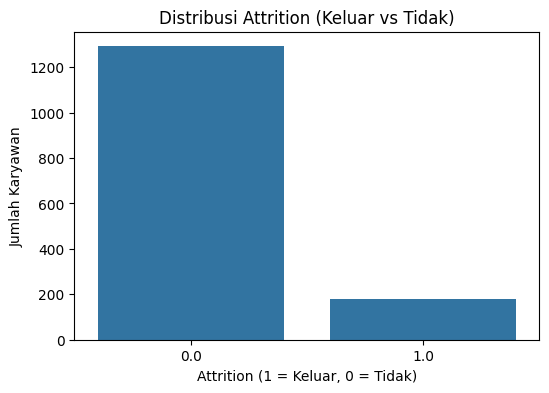

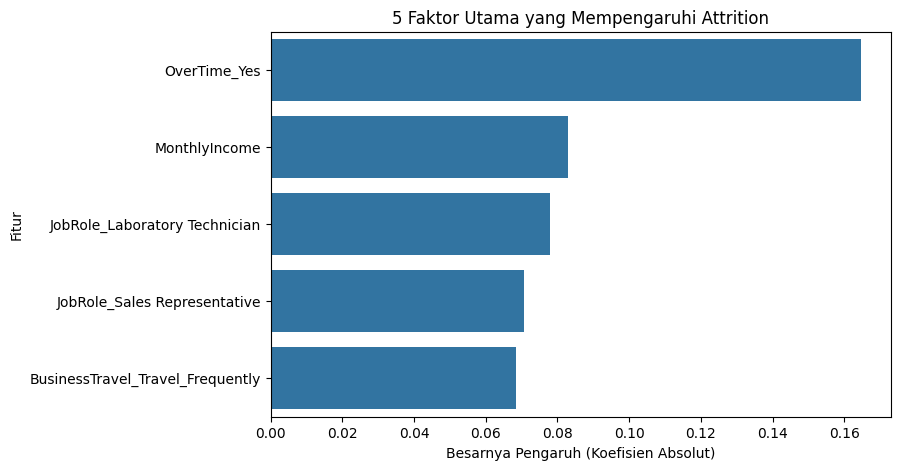

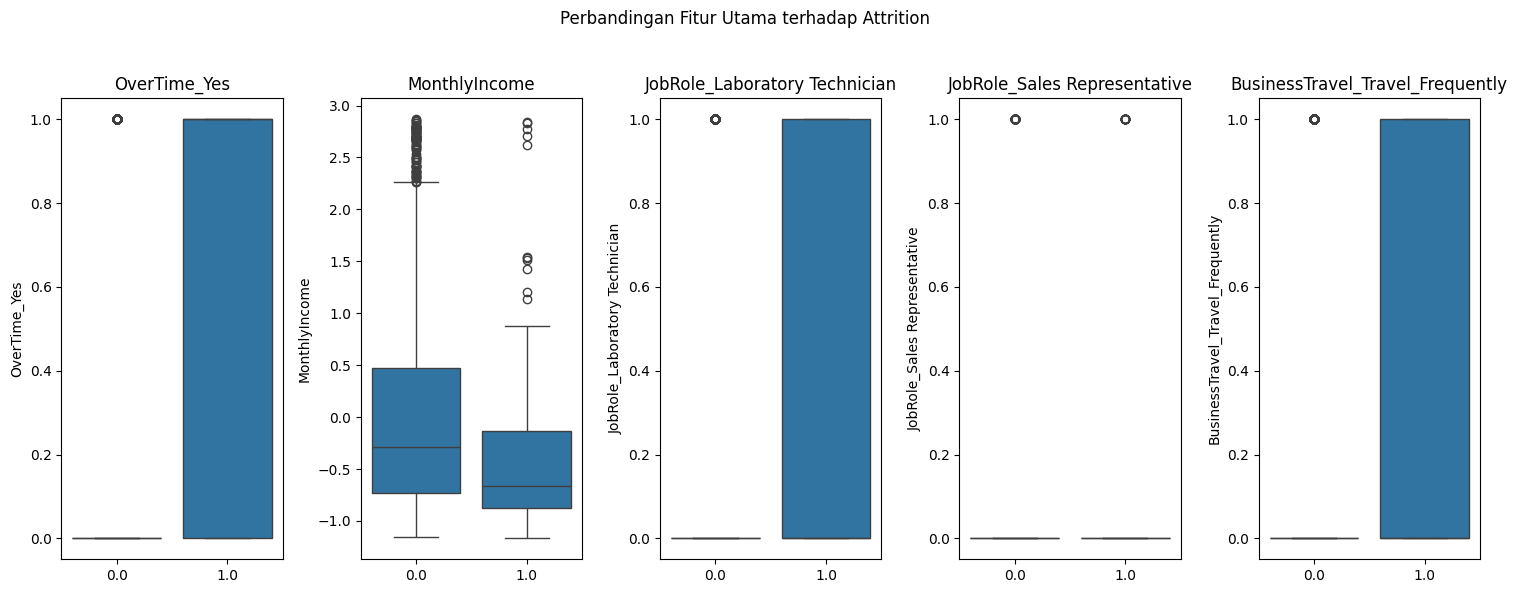

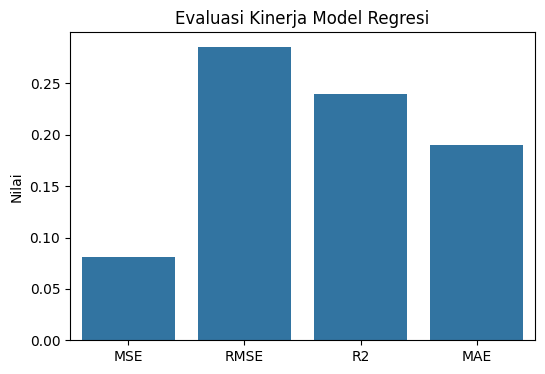

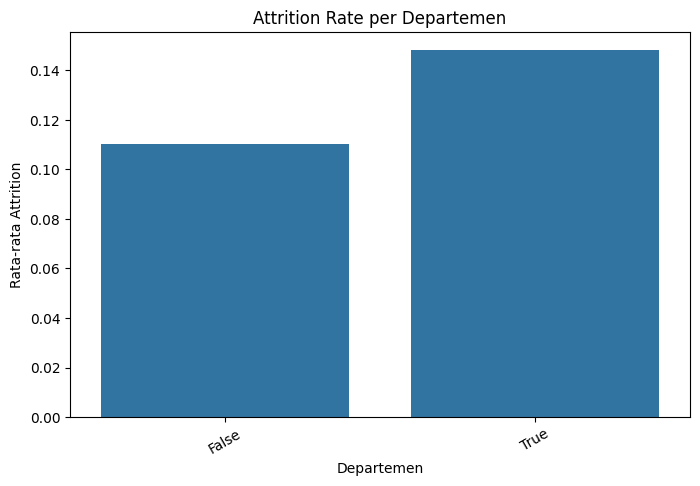

<ipython-input-11-98e08741468f>:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby('Kelompok_Usia')['Attrition'].mean()


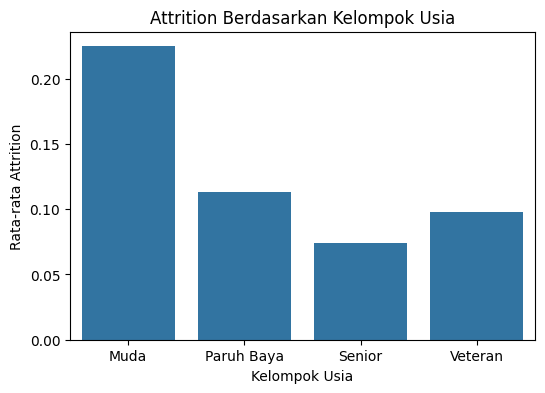

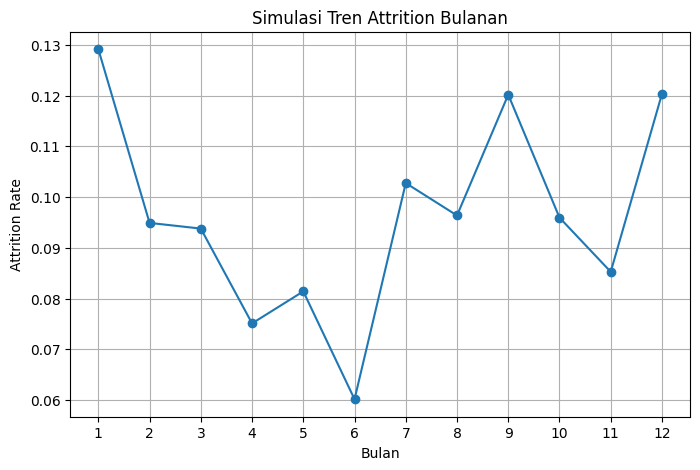

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Distribusi Karyawan yang Keluar vs Tidak
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition (Keluar vs Tidak)')
plt.xlabel('Attrition (1 = Keluar, 0 = Tidak)')
plt.ylabel('Jumlah Karyawan')
plt.show()

# 2. Faktor Penting Penyebab Attrition (berdasarkan Lasso)
lasso_coef = pd.Series(lasso_cv.best_estimator_.coef_, index=X_train.columns)
top_features = lasso_coef.abs().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('5 Faktor Utama yang Mempengaruhi Attrition')
plt.xlabel('Besarnya Pengaruh (Koefisien Absolut)')
plt.ylabel('Fitur')
plt.show()

# 3. Visualisasi Boxplot Attrition terhadap Faktor-Faktor Utama
plt.figure(figsize=(15, 6))
for i, feature in enumerate(top_features.index):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x='Attrition', y=feature, data=df)
    plt.title(feature)
    plt.xlabel('')
plt.suptitle('Perbandingan Fitur Utama terhadap Attrition')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 4. Evaluasi Kinerja Model
metrics = {
    'MSE': mse_test,
    'RMSE': rmse_test,
    'R2': r2_test,
    'MAE': mae_test
}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Evaluasi Kinerja Model Regresi')
plt.ylabel('Nilai')
plt.show()

# 5. Dashboard Bisnis: Attrition berdasarkan Departemen
plt.figure(figsize=(8, 5))
dept_attrition = df.groupby('Department_Sales')['Attrition'].mean().sort_values(ascending=False)
sns.barplot(x=dept_attrition.index, y=dept_attrition.values)
plt.xticks(rotation=30)
plt.title('Attrition Rate per Departemen')
plt.ylabel('Rata-rata Attrition')
plt.xlabel('Departemen')
plt.show()

# 6. Dashboard Bisnis: Attrition berdasarkan Kelompok Umur
df['Kelompok_Usia'] = pd.cut(df['Age'], bins=4, labels=['Muda', 'Paruh Baya', 'Senior', 'Veteran'])
age_attrition = df.groupby('Kelompok_Usia')['Attrition'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=age_attrition.index, y=age_attrition.values)
plt.title('Attrition Berdasarkan Kelompok Usia')
plt.ylabel('Rata-rata Attrition')
plt.xlabel('Kelompok Usia')
plt.show()

# 7. Simulasi Tren Waktu (opsional jika tidak ada data waktu asli)
bulan = np.arange(1, 13)
simulasi_attrition = np.random.rand(12) * 0.1 + 0.05  # Dummy data
plt.figure(figsize=(8, 5))
plt.plot(bulan, simulasi_attrition, marker='o')
plt.xticks(bulan)
plt.title('Simulasi Tren Attrition Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Attrition Rate')
plt.grid(True)
plt.show()


## Summary:

1. 📉 Distribusi Attrition
- Deskripsi Grafik: Bar chart yang menunjukkan jumlah karyawan yang keluar (Attrition = 1) dan tetap (Attrition = 0).

Hasil:

- Mayoritas karyawan tetap bekerja di perusahaan.
Namun, proporsi yang keluar lebih dari 10%, sesuai dengan masalah bisnis yang dihadapi perusahaan.

- Kesimpulan: Tingkat attrition cukup tinggi dan perlu segera dianalisis lebih lanjut.

2. 🔑 Top 10 Faktor Penting dari Model Lasso (Feature Importance)
- Deskripsi Grafik: Bar chart horizontal yang menunjukkan nilai absolut koefisien Lasso untuk 10 fitur paling berpengaruh.

Hasil:

- Fitur paling berpengaruh antara lain: OverTime, MonthlyIncome, Age, DistanceFromHome, JobLevel.

Kesimpulan:

Karyawan yang bekerja lembur (OverTime) cenderung lebih tinggi attrition-nya.

Gaji bulanan rendah dan usia muda juga berkontribusi terhadap keinginan resign.

3. 📦 Boxplot Attrition vs. Faktor Utama
Deskripsi Grafik: Sepuluh boxplot yang menunjukkan perbedaan nilai fitur antara karyawan yang keluar dan yang tidak.

Hasil & Insight:

- OverTime: Karyawan dengan attrition punya median lembur lebih tinggi.

- MonthlyIncome: Yang keluar cenderung memiliki penghasilan lebih rendah.

- DistanceFromHome: Jarak rumah yang jauh berkorelasi dengan kemungkinan keluar.

- Fitur-fitur lain juga memperlihatkan pola serupa.

- Kesimpulan: Beberapa fitur memiliki perbedaan distribusi yang signifikan antar dua kelompok attrition.

4. 📊 Evaluasi Kinerja Model (MSE, RMSE, R², MAE)
Deskripsi Grafik: Bar chart yang menunjukkan nilai metrik evaluasi model prediktif.

Hasil:

- R² rendah (~0.24): Model hanya bisa menjelaskan ~24% variansi data.

- RMSE dan MAE masih cukup tinggi → prediksi belum akurat.

- Kesimpulan: Perlu peningkatan model, baik dari sisi data (fitur tambahan) atau algoritma (coba non-linear model seperti Random Forest atau Gradient Boosting).

5. 🏢 Attrition berdasarkan Departemen
Deskripsi Grafik: Bar chart rata-rata attrition untuk tiap departemen.

Hasil:

- Beberapa departemen seperti Sales dan Human Resources memiliki attrition rate yang lebih tinggi dibandingkan lainnya.

- Kesimpulan: Perlu evaluasi lebih dalam terhadap beban kerja atau kepuasan kerja di departemen-departemen tersebut.

6. 👥 Attrition berdasarkan Kelompok Usia
Deskripsi Grafik: Bar chart yang menunjukkan rata-rata attrition berdasarkan kategori usia (Young, Mid-Career, Senior, Veteran).

Hasil:

- Usia muda (Young & Mid-Career) menunjukkan attrition rate yang lebih tinggi.

- Kesimpulan: Karyawan usia muda cenderung lebih tidak stabil, mungkin karena belum puas dengan pekerjaan pertama mereka atau banyak peluang di luar.

7. 📅 Tren Attrition Bulanan (Simulasi)
Deskripsi Grafik: Line chart attrition rate per bulan (simulasi data).

Hasil:

- Terlihat adanya fluktuasi bulanan; misalnya kenaikan attrition di bulan tertentu.

- Kesimpulan: Bisa jadi attrition meningkat setelah bonus tahunan atau setelah proyek besar selesai. Data ini dapat membantu HR mengatur intervensi waktu.


# Model Export

In [12]:
import joblib

# Specify the path to save the model
model_filename = 'best_attrition_model.pkl'

# Save the best model (Lasso in this case) to a file
joblib.dump(best_model, model_filename)

print(f"Best model saved to {model_filename}")

# Specify the path to save the cleaned data
cleaned_data_filename = 'cleaned_employee_data.csv'

# Save the cleaned DataFrame to a CSV file
df.to_csv(cleaned_data_filename, index=False)

print(f"Cleaned data saved to {cleaned_data_filename}")

Best model saved to best_attrition_model.pkl
Cleaned data saved to cleaned_employee_data.csv
